In [1]:
# Начальные данные и предварительные вычисления

import pandas as pd
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

# Функция для замены некорректных значений на NaN
def replaceto_nan_value(column):
    stud_math[column] = stud_math[column].apply(lambda x: np.nan if pd.isnull(x)
                                  else np.nan if str(x).strip() == '' else x)

    
# Функция для расчета статистических параметров: медианы, перцентилей, IQR, границ выбросов
def percentile_outlier(column, dict_interval):
    median = stud_math[column].median()
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    iqr = perc75 - perc25

    dict_interval[x] = [perc25, perc75, median, iqr, (round(
        perc25 - 1.5*(iqr), 2), round(perc75 - 1.5*(iqr), 2))]


# Функция для вычисления критерия Стьюдента и записи значимых переменных в новый список
def get_stat_dif(column, new_list):
    cols = stud_math.loc[:, column].dropna().unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        t_stud = ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'].dropna(),
                           stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        t_stud = np.nan_to_num(t_stud)
        if t_stud <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            new_list.append(column)
            break


stud_math = pd.read_csv('stud_math.csv')

numerical_list = []
object_list = []
dict_interval = {}

pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# Разделим все переменные на числовые и качественные

for x in stud_math.columns:
    replaceto_nan_value(x)
    if is_string_dtype(stud_math[x]):
        object_list.append(x)
    else:
        numerical_list.append(x)


# Заполнение статистических параметров
for x in numerical_list:
    percentile_outlier(x, dict_interval)


display(stud_math.describe())

# На основании представленных данных можно сказать,
# что в переменных "Fedu" и "famrel" содержатся значения, не входящие в область определения
# Далее на графиках посмотрим данное заключение более подробно, чтобы определить, как преобразовывать данные

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [3]:
# Выводим данные по значениям переменным, в которых присутствуют NaN значения
for x in stud_math.columns:
    if stud_math[x].isna().sum() != 0:
        print("Переменная:", x, "\nКол-во уник. зн-ний:", len(stud_math[x].dropna().unique()),
              ", Кол-во NAN зн-ний:", stud_math[x].isna().sum(),
              ", Доля NaN зн-ний:", str(round(stud_math[x].isna().sum() /
                                              len(stud_math.index)*100, 1)) + "%",
              ", Кол-во зн-ний по сумме > 10:", (stud_math[x].value_counts() > 10).sum(), "\n"
              )

# По результатам проверки можно сказать, что значений NaN в столбцах очень много
# их удаление приведет к существенному сокращению датафрейма
# Чтобы предварительно не скажать прогнозы, заполнять значения не будем

Переменная: address 
Кол-во уник. зн-ний: 2 , Кол-во NAN зн-ний: 17 , Доля NaN зн-ний: 4.3% , Кол-во зн-ний по сумме > 10: 2 

Переменная: famsize 
Кол-во уник. зн-ний: 2 , Кол-во NAN зн-ний: 27 , Доля NaN зн-ний: 6.8% , Кол-во зн-ний по сумме > 10: 2 

Переменная: Pstatus 
Кол-во уник. зн-ний: 2 , Кол-во NAN зн-ний: 45 , Доля NaN зн-ний: 11.4% , Кол-во зн-ний по сумме > 10: 2 

Переменная: Medu 
Кол-во уник. зн-ний: 5 , Кол-во NAN зн-ний: 3 , Доля NaN зн-ний: 0.8% , Кол-во зн-ний по сумме > 10: 4 

Переменная: Fedu 
Кол-во уник. зн-ний: 6 , Кол-во NAN зн-ний: 24 , Доля NaN зн-ний: 6.1% , Кол-во зн-ний по сумме > 10: 4 

Переменная: Mjob 
Кол-во уник. зн-ний: 5 , Кол-во NAN зн-ний: 19 , Доля NaN зн-ний: 4.8% , Кол-во зн-ний по сумме > 10: 5 

Переменная: Fjob 
Кол-во уник. зн-ний: 5 , Кол-во NAN зн-ний: 36 , Доля NaN зн-ний: 9.1% , Кол-во зн-ний по сумме > 10: 5 

Переменная: reason 
Кол-во уник. зн-ний: 4 , Кол-во NAN зн-ний: 17 , Доля NaN зн-ний: 4.3% , Кол-во зн-ний по сумме > 10: 4

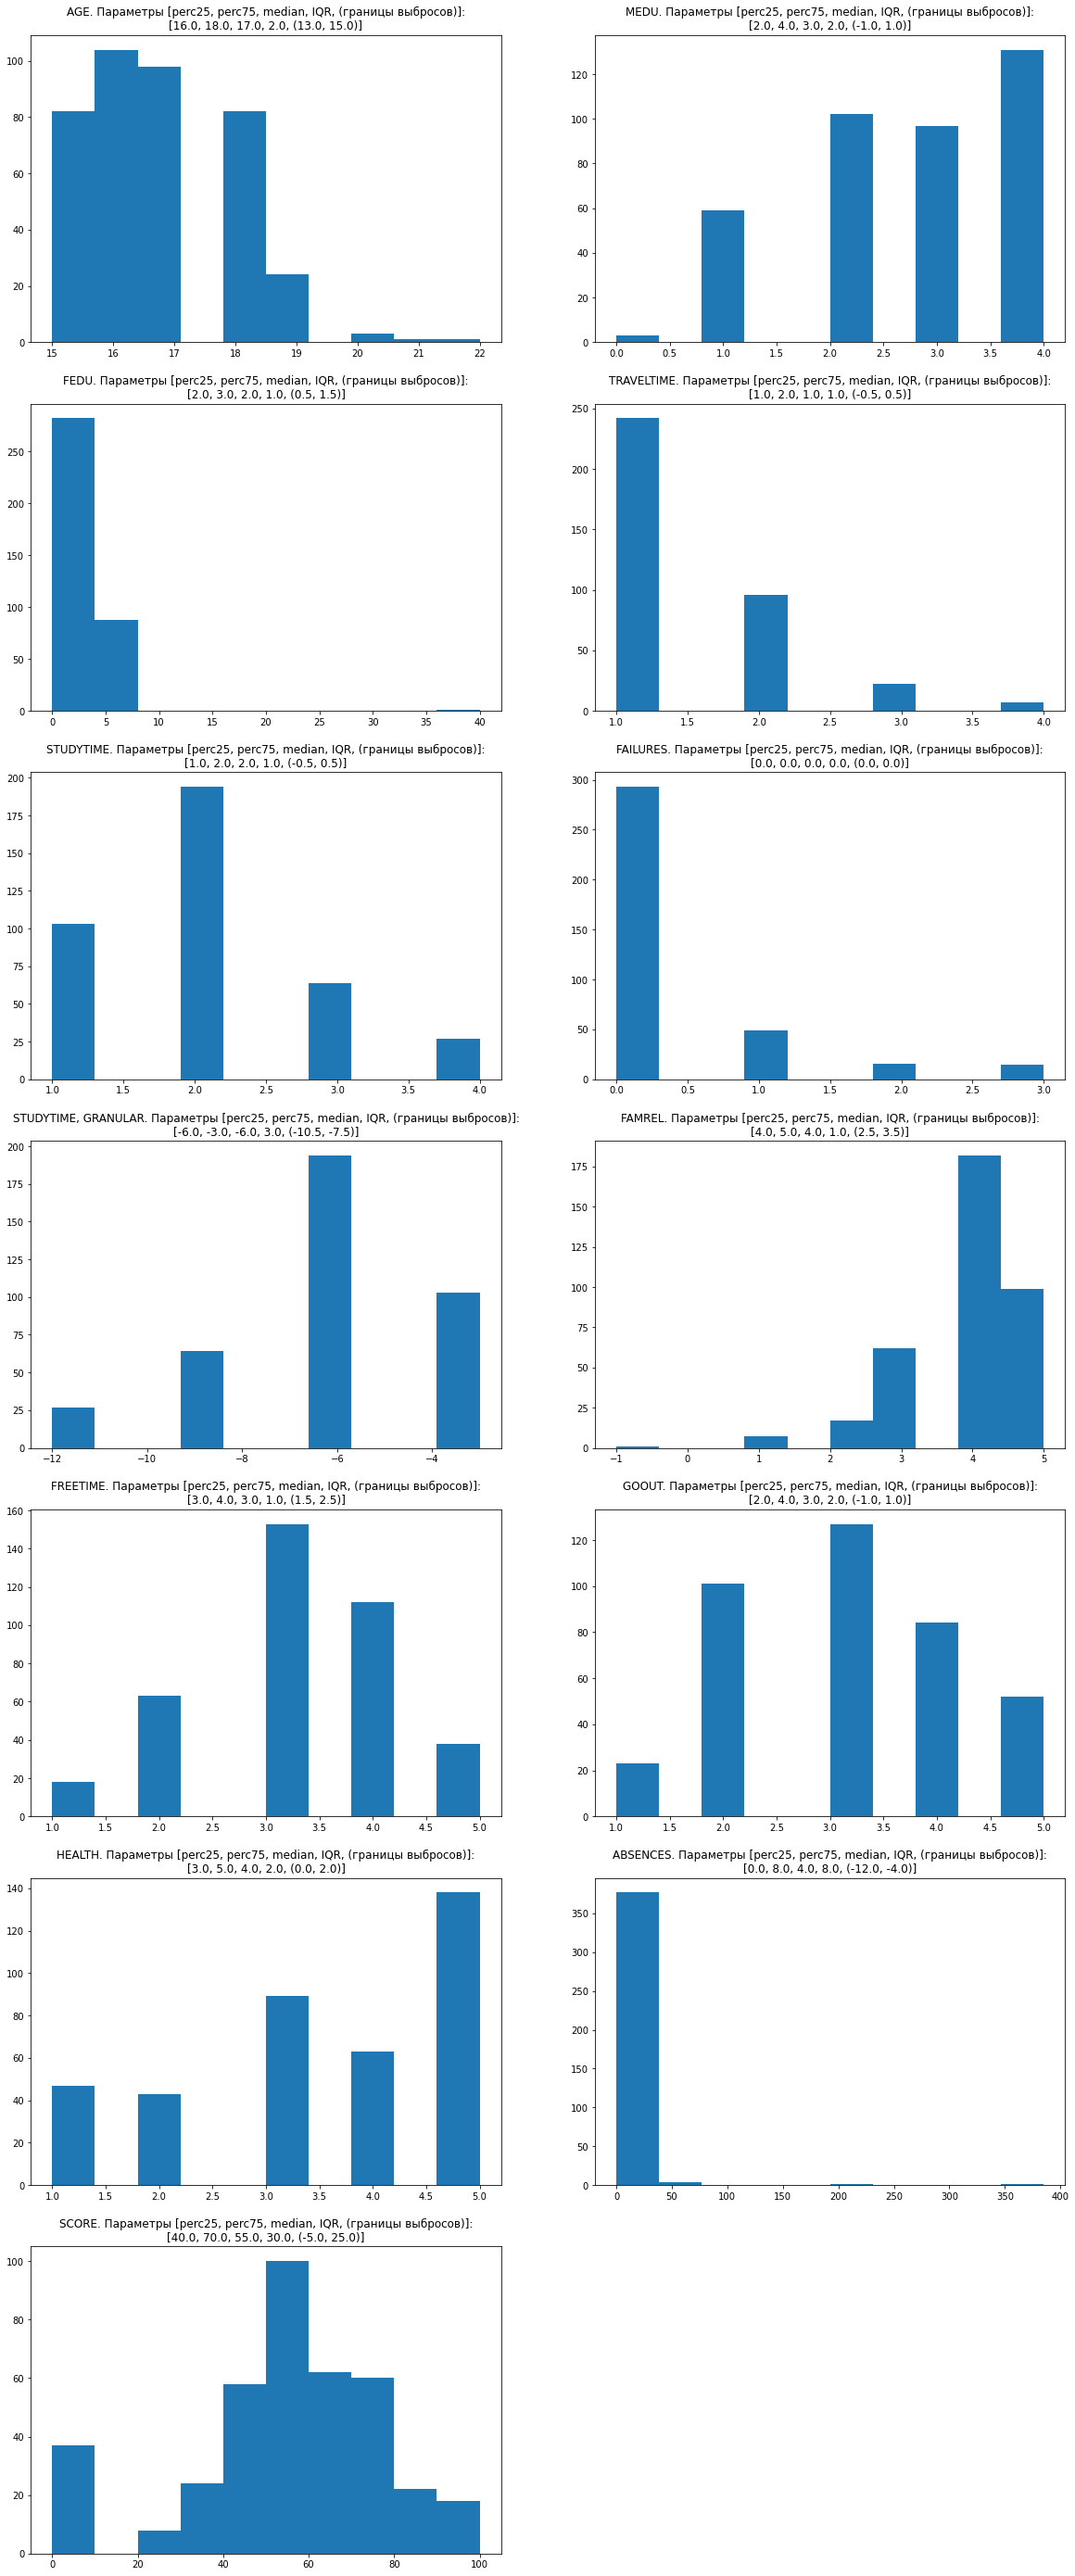

In [5]:
# Построение графиков для числовых переменных со статистическими переменными

range_x = 2
range_y = int(len(numerical_list)/range_x) + 1

fig, ax = plt.subplots(range_y, range_x, figsize=(20, 50))

ax = ax.flatten()

for x in range(len(numerical_list)):
    ax[x].hist(stud_math[numerical_list[x]])
    ax[x].set_title(numerical_list[x].upper() +
                    '. Параметры [perc25, perc75, median, IQR, (границы выбросов)]:\n'
                    + str(dict_interval[numerical_list[x]]))

fig.delaxes(ax[len(numerical_list)])

In [6]:
# Преобразование числовых столбцов на основании стастистических параметров
# и на основании области определения переменных

stud_math.loc[stud_math['Fedu'] == 40, 'Fedu'] = 4.0

stud_math = stud_math[stud_math['famrel'] > 0]

# Вывод: некорректных данных практически нет
# Несмотря на то, что многие значения попадают по выбросы,
# они находятся в области определения, и, соответственно, выбросами не являются

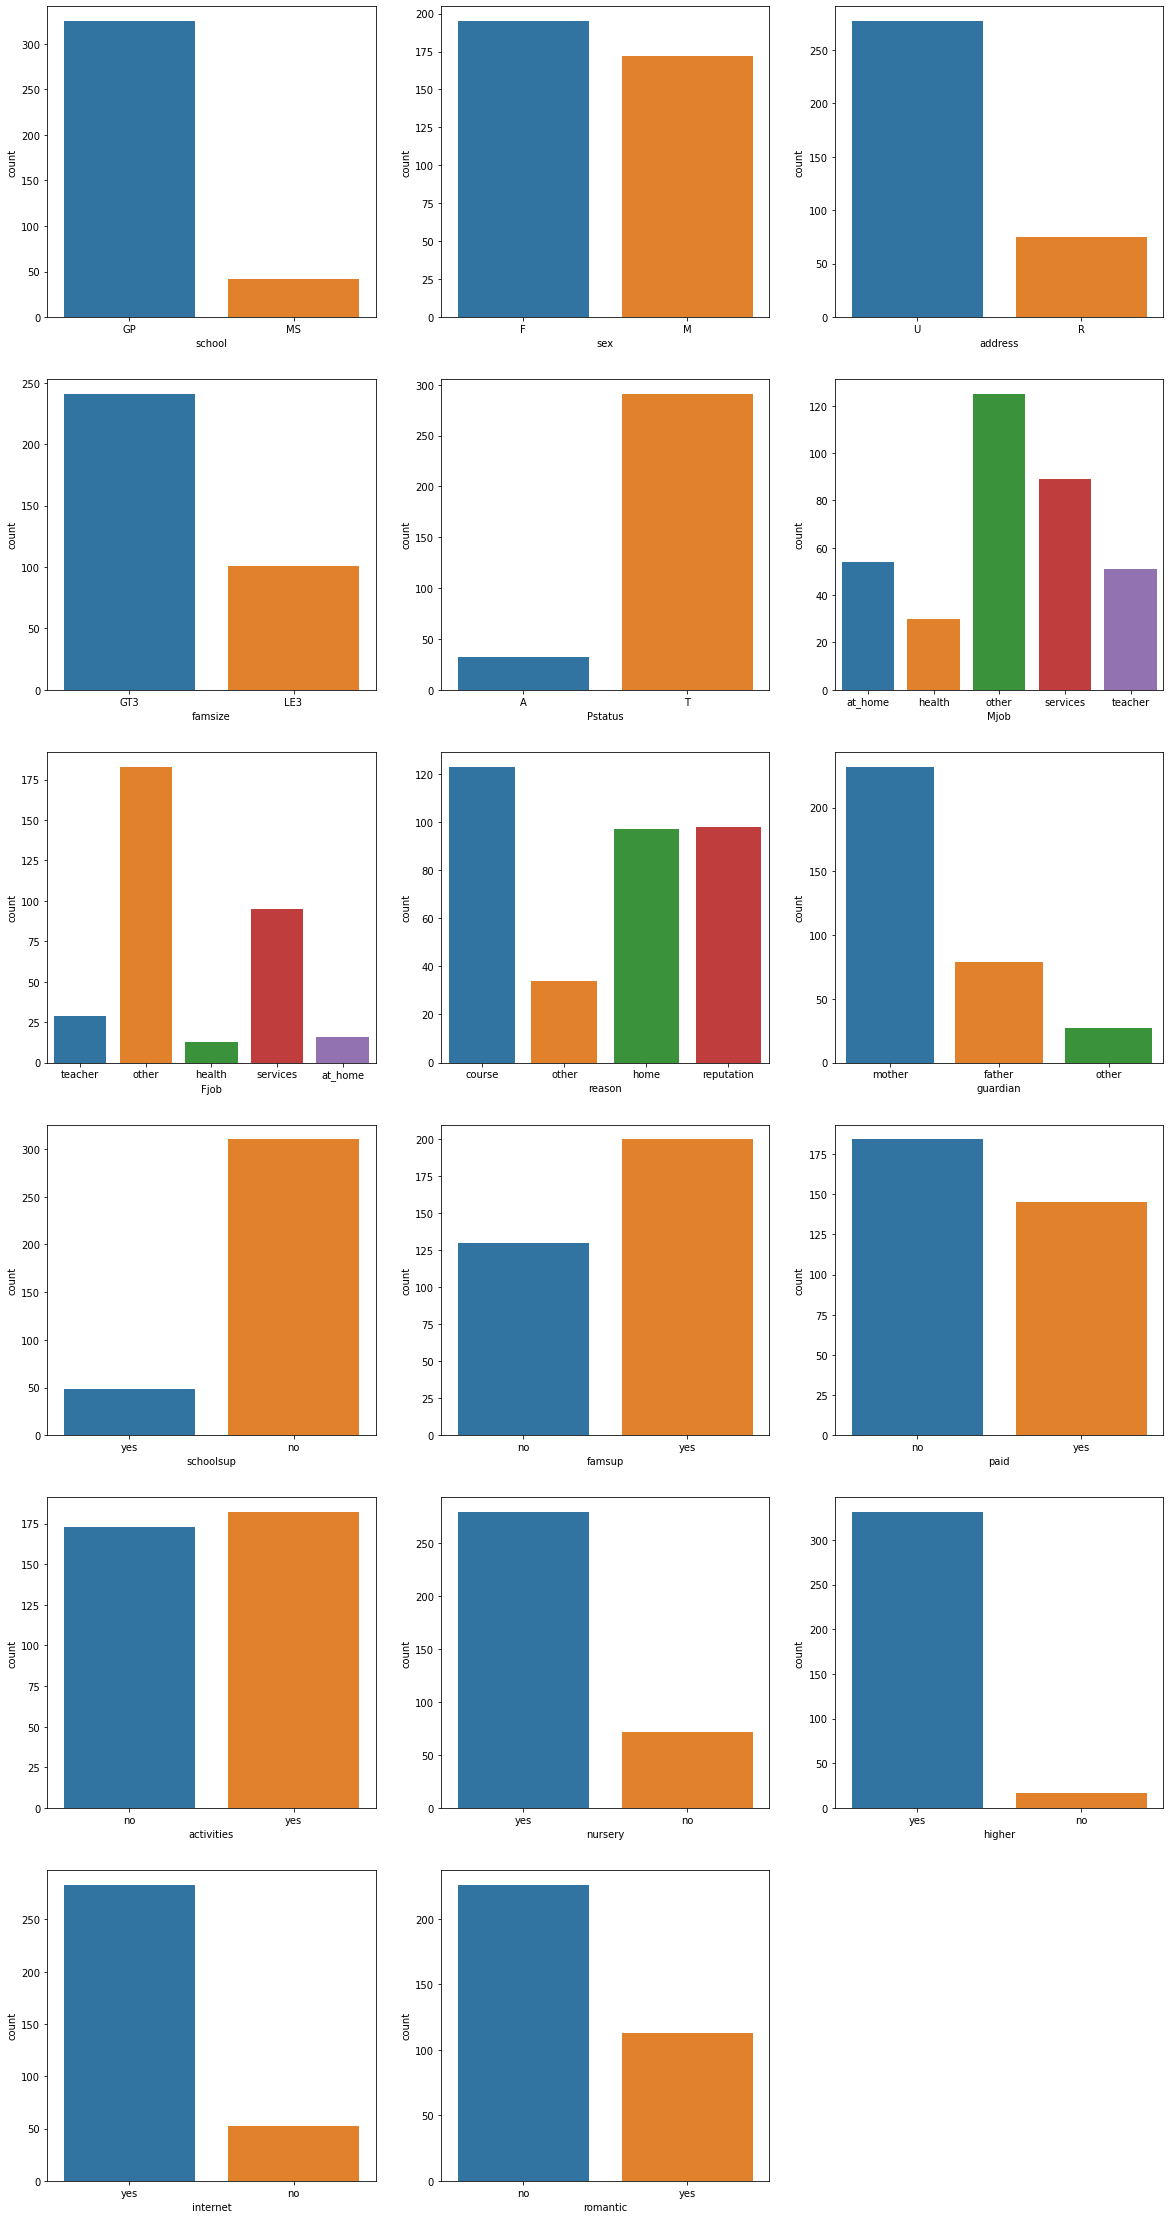

In [7]:
# Построение графиков для качественных переменных

range_x = 3
range_y = int(len(object_list)/range_x) + 1

fig, ax = plt.subplots(range_y, range_x, figsize=(20, 40))

ax = ax.flatten()

for x in range(len(object_list)):
    sns.countplot(stud_math[object_list[x]], ax=ax[x])

fig.delaxes(ax[len(object_list)])

# На основании полученных данных можно сказать, что все данные находятся в области определения
# и их преобразовывать не нужно

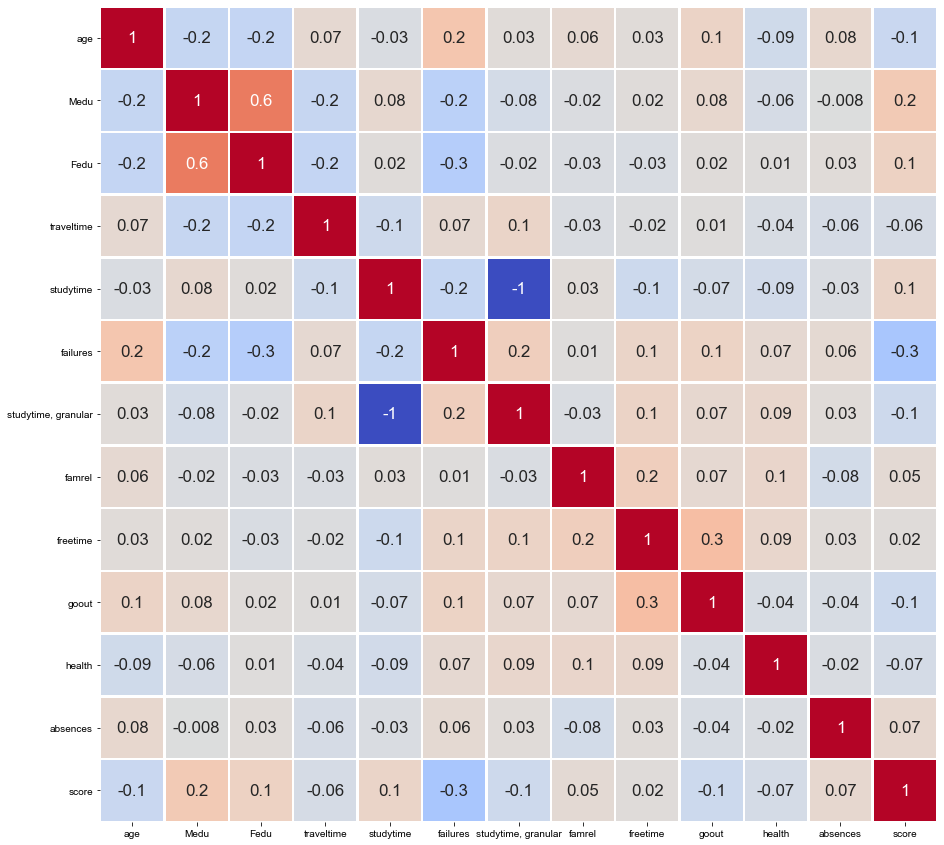

In [8]:
# Построение графика корреляционной таблицы для числовых переменных

correl = stud_math.corr()
plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(correl, annot=True, cmap='coolwarm', linewidths=1.5,
            fmt='.1g', xticklabels=1, yticklabels=1, cbar=False)

In [9]:
# На основании данных и области определения переменных можно удалить столбец "studytime, granular"
# Также мы видим, что переменные "Medu" и "Fedu" средне скоррелированны.


correl = stud_math.corr()
display(correl[correl.index == 'score'])

numerical_list.remove('studytime, granular')

# На основании данных о корреляции переменных относительно переменной "score"
# и на знании о том, что корреляция считается слабой, если она <= 0,5
# можно оставить все оставшиеся чтсловые переменные

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
score,-0.147145,0.20971,0.133365,-0.059458,0.110295,-0.338977,-0.110295,0.051219,0.021734,-0.120741,-0.067258,0.07368,1.0


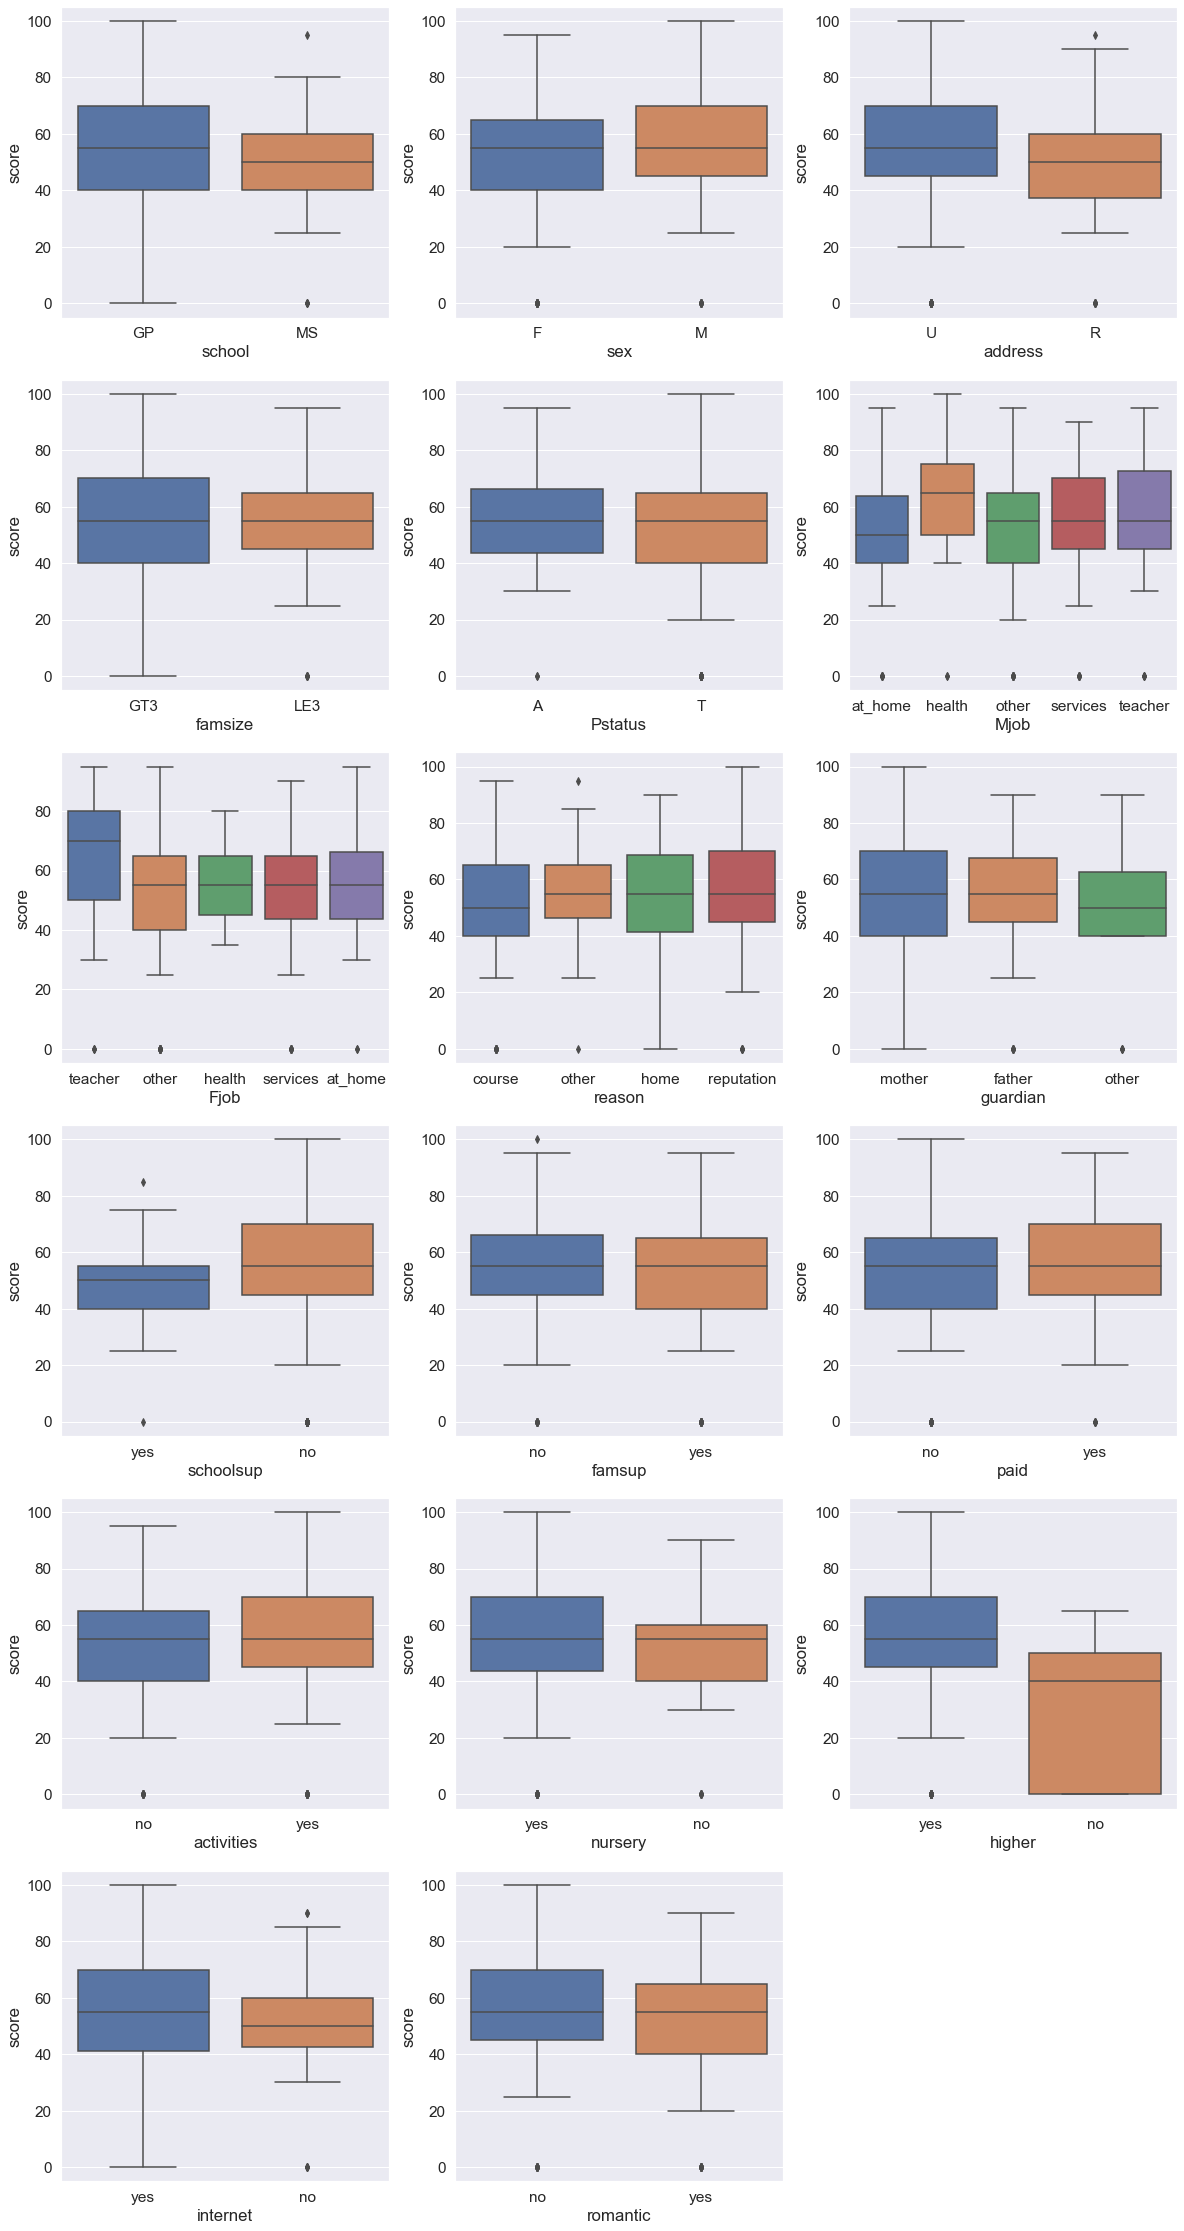

In [10]:
# Изображение boxplot для качественных переменных относительно 'score'
# Так как количество значений номинативных переменных небольшое, можно изобразить все

range_x = 3
range_y = int(len(object_list)/range_x) + 1

fig, ax = plt.subplots(range_y, range_x, figsize=(20, 40))

ax = ax.flatten()

for t in range(len(object_list)):
    sns.boxplot(x=object_list[t], y='score', ax=ax[t], data=stud_math)

fig.delaxes(ax[len(object_list)])

In [11]:
# Используем тест Стьюдента для определения значимых качественных переменных

# Новый список для качественных переменных
object_list_new = []


for col in object_list:
    get_stat_dif(col, object_list_new)

Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [12]:
# Получаем значимые переменные в списках:

print(object_list_new, numerical_list, sep='\n')


# Переопределяем исходную таблицу переменными из полученных списков
stud_math = stud_math.loc[:,numerical_list+object_list_new]
stud_math

# Вывод: на основании анализа данных можно сказать,
# что данные в целом корректные за исключением большого числа null значений
# Получилось большое число значимых переменных

['paid', 'higher', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,paid,higher,romantic
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,no,yes,no
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,no,yes,no
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0,NaN,yes,NaN
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0,yes,yes,yes
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,212.0,45.0,yes,yes,no
391,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0,no,yes,no
392,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0,no,NaN,no
393,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0,no,yes,no
